# Adult Census Income

1. Attribute Information:Listing of attributes:>50K, <=50K.
2. age:continuous.
3. workclass:Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
4. fnlwgt:continuous.
5. education:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,Doctorate, 5th-6th, Preschool.
6. education-num:continuous.
7. marital-status:Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
8. occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
9. relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
10. race:White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
11. sex:Female, Male.
12. capital-gain:continuous.
13. capital-loss:continuous.
14. hours-per-week:continuous.
15. native-country:United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
16. Income: 0, 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA

In [2]:
income = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
income.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
income.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
martial_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
income['USA'] = income['native_country'].str.contains('United-States')
us = income[income['USA'] == True]
us['rich'] = us['income'].str.contains('>50K')
us.shape

C:\Users\Lance K Lau\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(29169, 17)

In [6]:
income['education'].replace(' Preschool', 'dropout',inplace=True)
income['education'].replace(' 10th', 'dropout',inplace=True)
income['education'].replace(' 11th', 'dropout',inplace=True)
income['education'].replace(' 12th', 'dropout',inplace=True)
income['education'].replace(' 1st-4th', 'dropout',inplace=True)
income['education'].replace(' 5th-6th', 'dropout',inplace=True)
income['education'].replace(' 7th-8th', 'dropout',inplace=True)
income['education'].replace(' 9th', 'dropout',inplace=True)
income['education'].replace('HS-Grad', 'HighGrad',inplace=True)
income['education'].replace(' HS-grad', 'HighGrad',inplace=True)
income['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
income['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
income['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
income['education'].replace(' Bachelors', 'Bachelors',inplace=True)
income['education'].replace(' Masters', 'Masters',inplace=True)
income['education'].replace(' Prof-school', 'Masters',inplace=True)
income['education'].replace(' Doctorate', 'Doctorate',inplace=True)

In [7]:
income.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,USA
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
1,38,Private,215646,HighGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
2,53,Private,234721,dropout,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,True


In [8]:
high = us[us['rich']==True]
high.shape

(7171, 17)

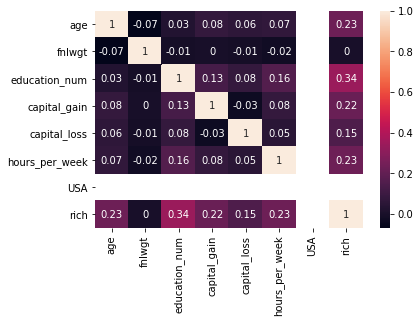

In [9]:
a = us.corr().round(2)
sns.heatmap(data=a, annot=True)

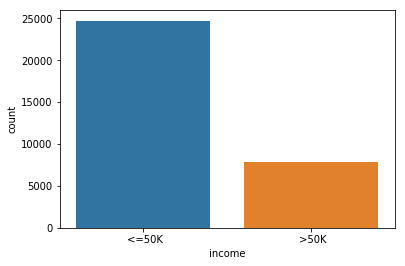

In [10]:
sns.countplot(x='income', data=income)

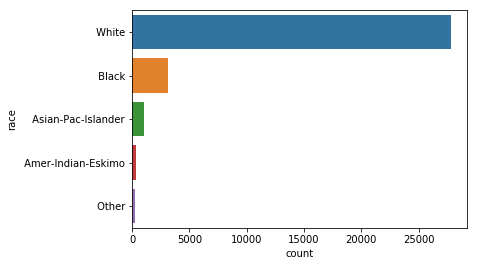

In [11]:
sns.countplot(y='race', data=income)

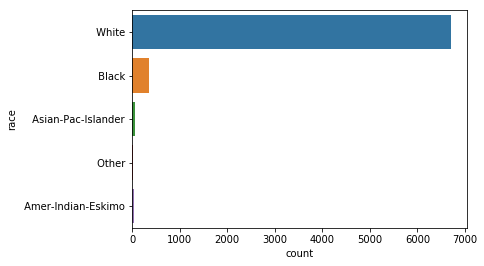

In [12]:
sns.countplot(y='race', data=high)

The dataset is not very diverse (US white supremacy?)

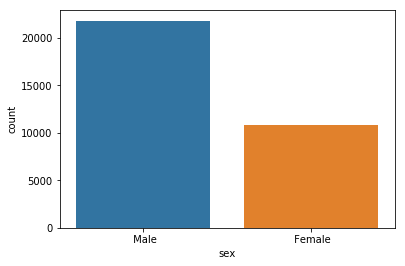

In [13]:
sns.countplot(x='sex', data=income)

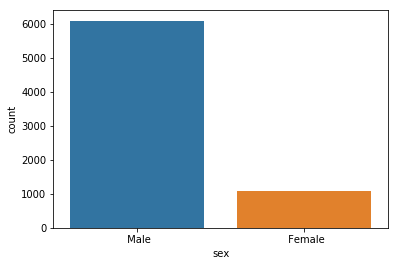

In [14]:
sns.countplot(x='sex', data=high)

Male is dominating the sample size across whole sample and high earner

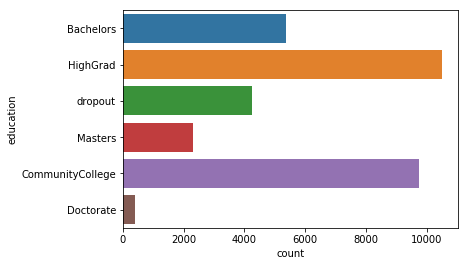

In [15]:
sns.countplot(y='education', data=income)

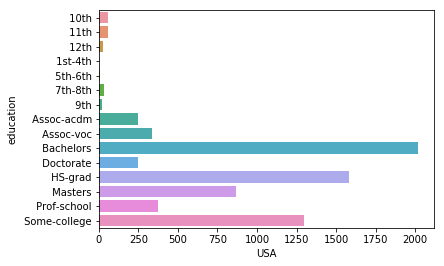

In [16]:
education = high.groupby(['education']).USA.count().reset_index()
sns.barplot(x='USA', y='education', data=education)

Large proportion of high earners received higher education

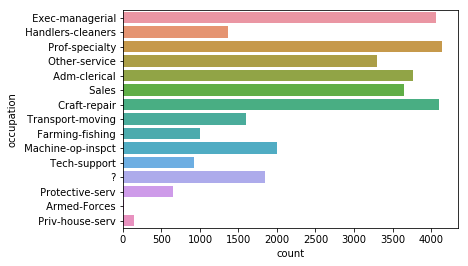

In [17]:
sns.countplot(y='occupation', data=income)

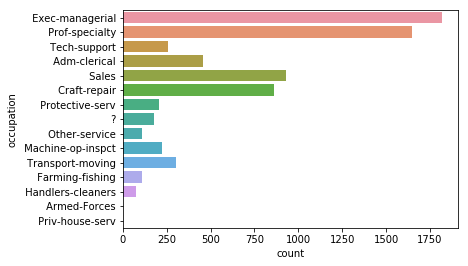

In [18]:
sns.countplot(y='occupation', data=high)

People with higher income are more willing to share their occupation

# Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
X = income[['sex', 'occupation', 'education', 'martial_status', 'capital_gain', 'workclass']].values

In [5]:
income_mapping = {label: idx for idx, label in enumerate(np.unique(income['income']))}
label = income['income'].map(income_mapping)

In [6]:
one = OneHotEncoder() #categorical_features=[0]
X1 = one.fit_transform(X).toarray()

In [27]:
dummy = pd.get_dummies(income[['sex', 'occupation', 'education', 'martial_status', 'capital_gain', 'workclass']])
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 50 columns):
capital_gain                             32560 non-null int64
sex_ Female                              32560 non-null uint8
sex_ Male                                32560 non-null uint8
occupation_ ?                            32560 non-null uint8
occupation_ Adm-clerical                 32560 non-null uint8
occupation_ Armed-Forces                 32560 non-null uint8
occupation_ Craft-repair                 32560 non-null uint8
occupation_ Exec-managerial              32560 non-null uint8
occupation_ Farming-fishing              32560 non-null uint8
occupation_ Handlers-cleaners            32560 non-null uint8
occupation_ Machine-op-inspct            32560 non-null uint8
occupation_ Other-service                32560 non-null uint8
occupation_ Priv-house-serv              32560 non-null uint8
occupation_ Prof-specialty               32560 non-null uint8
occupation_ Protective-

In [7]:
X_train, X_test, label_train, label_test = train_test_split(X1, label, test_size=0.3, random_state=0)

Split function would consume over 5GB RAM memory when I include final weight column, reason is still unknown.

# Train and Test Data Scaling

In [8]:
mms = MinMaxScaler()  ##Good for optimization algorithms such as gradient descent (Logistic regression, SVM)
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [9]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# Compressing scaled data via Dimensionality Reduction

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, label_train)
X_test_lda = lda.fit_transform(X_test_std, label_test)

C:\Users\Lance K Lau\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lance K Lau\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [13]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

# L1 regularizated Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(penalty='l1', C=0.1) ##C is the value that determine the 'intensity' of regularisation
lr.fit(X_train_lda, label_train)

C:\Users\Lance K Lau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
l_pred = lr.predict(X_test_lda)

In [64]:
print(confusion_matrix(label_test, l_pred))
print(classification_report(label_test, l_pred))

[[7036  418]
 [ 981 1333]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7454
           1       0.76      0.58      0.66      2314

   micro avg       0.86      0.86      0.86      9768
   macro avg       0.82      0.76      0.78      9768
weighted avg       0.85      0.86      0.85      9768



# Random Forests

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [35]:
feat_labels = income.columns[1:]

forest = RandomForestClassifier(n_estimators=100, random_state=1)

In [39]:
forest.fit(X_train_lda, label_train)
importances = forest.feature_importances_

In [56]:
f_pred = forest.predict(X_test_lda)

In [57]:
print(confusion_matrix(label_test,f_pred))
print(classification_report(label_test,f_pred))

[[6873  581]
 [1122 1192]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7454
           1       0.67      0.52      0.58      2314

   micro avg       0.83      0.83      0.83      9768
   macro avg       0.77      0.72      0.74      9768
weighted avg       0.82      0.83      0.82      9768



# Finding the optimal number of trees 

In [17]:
series = [50, 100, 150, 200, 250, 300, 400, 500]
train_scores, test_score = 
validation_curve(forest, X_train_norm, label_train, 'n_estimators', param_range=series, cv=10, scoring='accuracy', n_jobs=-1)

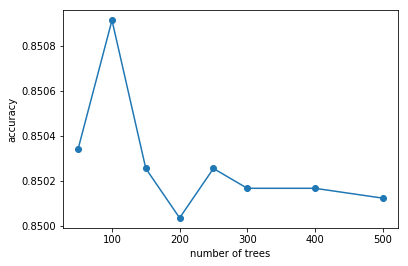

In [20]:
plt.figure()
plt.plot(series, np.mean(test_score, axis=1), '-o')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.show()

Although the accuracy score not improved much, it decreased the computation time.

# Feature Importance

In [34]:
indices = np.argsort(importances)[::-1]

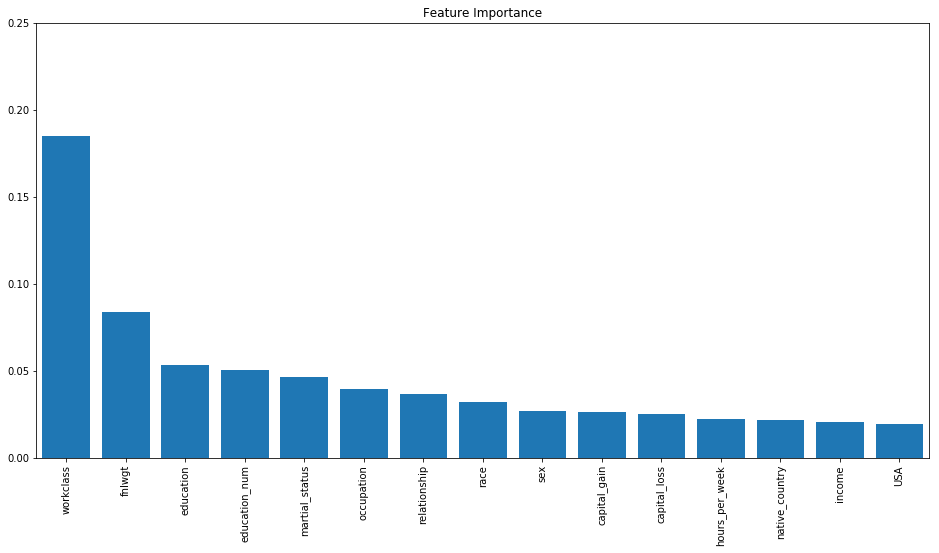

In [35]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.bar(range(X_train_norm.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_norm.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train_norm.shape[1]])
plt.title('Feature Importance')
plt.axis([-0.5, 14.5, 0, 0.25])
plt.show()

Added feature 'work class' to my model according to this graph, resulting 1% of accuracy rate increase 
(Random Forest only, Logistic Regression model have 1% drop after adding 'work class')

# kNN Classification

In [71]:
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn import metrics

In [74]:
for k in [1, 5, 10, 100]:
    knn = KN(n_neighbors = k).fit(X_train_lda, label_train)
    print ('for k= %3i accuracy is %.3f' % (k, knn.score(X_test_lda, label_test))) 

for k=   1 accuracy is 0.808
for k=   5 accuracy is 0.836
for k=  10 accuracy is 0.851
for k= 100 accuracy is 0.856


In [29]:
knn = KN(n_neighbors = 10).fit(X_train_lda, label_train)
y_pred = knn.predict(X_test_lda)

In [53]:
print(confusion_matrix(label_test,y_pred))
print(classification_report(label_test,y_pred))

[[7051  403]
 [1056 1258]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7454
           1       0.76      0.54      0.63      2314

   micro avg       0.85      0.85      0.85      9768
   macro avg       0.81      0.74      0.77      9768
weighted avg       0.84      0.85      0.84      9768



# K-Mean Clustering

In [40]:
from sklearn.cluster import KMeans

In [66]:
km = KMeans(n_clusters = 2, random_state=90)
km.fit(X_train_pca, label_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=90, tol=0.0001, verbose=0)

In [67]:
k_pred = km.predict(X_test_pca)

In [68]:
km.cluster_centers_

array([[-1.94369938,  0.34142939],
       [ 1.18157725, -0.20755535]])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(confusion_matrix(label_test,k_pred))
print(classification_report(label_test,k_pred))

[[3448 4006]
 [ 254 2060]]
              precision    recall  f1-score   support

           0       0.93      0.46      0.62      7454
           1       0.34      0.89      0.49      2314

   micro avg       0.56      0.56      0.56      9768
   macro avg       0.64      0.68      0.55      9768
weighted avg       0.79      0.56      0.59      9768



# Bagging Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('Logistic', log_clf), ('forest', rnd_clf), ('svc', svm_clf)],
    voting='hard')